Machine Learning code


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL 
import pandas as pd
import random


# Load all the images
df = pd.read_csv("/content/iris.data", names=['sepal length','sepal width','petal length','petal width','target'])

# different target names
targetNames = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Two dimension of variation
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
features = df.loc[:, features].values
# Separating out the target
target = df.loc[:,['target']].values


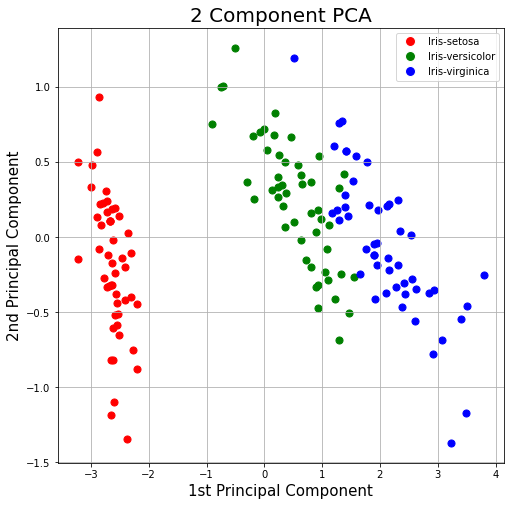

In [ ]:
from numpy.linalg import svd
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
# Find the mean of each feature
means = np.mean(features, axis = 0)
# Center the data this will give how far each feature is from mean
centeredData = features - means
# Use svd() to find the PCs, [2] gives all the topPCs
V = svd(centeredData, full_matrices=True)[2]
# return top 2 PCs
top2PCs = V[:2]
# Apply these PCs to the data to tranform it to two dimensions
twoPCTransformed = np.matmul(centeredData, top2PCs.transpose())
# Apply all the PCs generated to the data to tranform it to 4 PC dimensions
allPCTransformed = np.matmul(centeredData, V.transpose())

# Graph the new transformed data points to two dimensions
fig = plt.figure(figsize = (8,8))
fig = fig.add_subplot(1,1,1) 
fig.set_xlabel('1st Principal Component', fontsize = 15)
fig.set_ylabel('2nd Principal Component', fontsize = 15)
fig.set_title('2 Component PCA', fontsize = 20)
# Loop through data points and plot them
for i in range(len(twoPCTransformed)):
    if target[i] == 'Iris-setosa':
      colour = 'r'
    elif target[i] == 'Iris-versicolor':
      colour = 'g'
    elif target[i] == 'Iris-virginica':
      colour = 'b'
    xy = twoPCTransformed[i]
    fig.scatter(xy[0]
               , xy[1]
               , c = colour
               , s = 50
               , label = target[i])
elements = [Line2D([0], [0], marker='o', color='w', label='Iris-setosa',
                          markerfacecolor='r', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Iris-versicolor',
                          markerfacecolor='g', markersize=10),
                  Line2D([0], [0], marker='o', color='w', label='Iris-virginica',
                          markerfacecolor='b', markersize=10)]
fig.legend(handles = elements)
fig.grid()


In [ ]:
# This will train an individual class that applies for one target
def trainClass(data, className, weights):
  # For each item in data loop through and train for data
	for i in range(len(data)):
		# Extract needed data
    # data[i][0] relates to data features
		y_train = data[i][1]
		features = []
		features.append(data[i][0])
		w = [1.0]
		w.append(features[0][0])
		w.append(features[0][1])
		if len(features[0]) > 2:
			w.append(features[0][2])
			w.append(features[0][3])
		else:
			w.append(0)
			w.append(0)
		# Predict target
		WTX = (w[0]*weights[0]) + (w[1]*weights[1]) + (w[2]*weights[2]) + (w[3]*weights[3]) + (w[4]*weights[4])

		y = 0
		# As this data point is the class we are classifying for output needs to be postive
		if y_train == className:
			y = 1
		else:
			y = -1
    # Get the postive/negative and take away what the classifier should generate
		error = np.sign(WTX) - y
    # The classifier is incorrect adjust it
		if error != 0:
      # Edit all the weights of the classifier by the features values
			weights[0] = weights[0] + (w[0]*y)
			weights[1] = weights[1] + (w[1]*y)
			weights[2] = weights[2] + (w[2]*y)
			weights[3] = weights[3] + (w[3]*y)
			weights[4] = weights[4] + (w[4]*y)
		#print(weights)
	
	return weights

In [ ]:
# Given a perceptron pass data through and calculate how many it classifys correctly
def perceptronError(data, virginicaClass, versicolorClass, setosaClass):
  error = 0
  correct = 0
  # Loop through all data
  for i in range(len(data)):
    # Store prediction for each target
    z = [0, 0, 0]
    # Store the datas features values
    x = []
    # extract needed data
    x.append(data[i][0][0])
    x.append(data[i][0][1])
    if len(data[i][0]) < 4:
      x.append(0)
      x.append(0)
    else:
      x.append(data[i][0][2])
      x.append(data[i][0][3])

    # Calculate setosa prediction
    w = setosaClass
    z[0] = (w[0]) + (w[1]*x[0]) + (w[2]*x[1]) + (w[3]*x[2]) + (w[4]*x[3])

    # Calculate versicolor Prediction
    w = versicolorClass
    z[1] = (w[0]) + (w[1]*x[0]) + (w[2]*x[1]) + (w[3]*x[2]) + (w[4]*x[3])
    # Calculate virginica prediction
    w = virginicaClass
    z[2] = (w[0]) + (w[1]*x[0]) + (w[2]*x[1]) + (w[3]*x[2]) + (w[4]*x[3])

    # Figure which classifer generates a positive values
    # Setosa is positive therefore classify as setosa
    if z[0] > 0:
      # Check against true target value
      if data[i][1] != 'Iris-setosa':
        error += 1
      else:
        correct += 1
    # If true virginica is predicted target
    elif z[2] > 0:
      # Check against true target value
      if data[i][1] != 'Iris-virginica':
        error += 1
      else:
        correct += 1
    # Else can assume that versicolor is the target
    else:
      if data[i][1] != 'Iris-versicolor':
        error += 1
      else:
        correct += 1


  print("Errors: ", error)

In [ ]:
# Train the classifiers for each target
def train(data):
  # Generate the weights array that stores regression model
  weights = [0.0, 0.0, 0.0, 0.0, 0.0]
  # Shuffle data
  random.shuffle(data)
  # Run training once for setosa
  setosaClass = trainClass(data, 'Iris-setosa', weights)
  # Repeat 50 times to fully train perceptron
  for i in range(50):
    # Shuffle data
    random.shuffle(data)
    # Train class
    setosaClass = trainClass(data, 'Iris-setosa', setosaClass)

  # Repeat for the versicolor target
  weights = [0.0, 0.0, 0.0, 0.0, 0.0]
  random.shuffle(data)
  versicolorClass = trainClass(data, 'Iris-versicolor', weights)
  for i in range(50):
    random.shuffle(data)
    versicolorClass = trainClass(data, 'Iris-versicolor', versicolorClass)
  # Repeat for the virginica target

  weights = [0.0, 0.0, 0.0, 0.0, 0.0]
  virginicaClass = trainClass(data, 'Iris-virginica', weights)
  for i in range(50):
    random.shuffle(data)
    virginicaClass = trainClass(data, 'Iris-virginica', virginicaClass)

  # Return three trained regressions 
  return virginicaClass, versicolorClass, setosaClass

Top 2 PCs perceptron

In [ ]:
# Extract the data applied to the top 2 PCs
twoPCdata = list(zip(twoPCTransformed, target))
# Format data [[[features], target], .....]
data = list(zip(twoPCTransformed, target))
# Train classifier with data
twoPCVirClass, twoPCVerClass, twoPCSetClass = train(twoPCdata)
print("Perceptron for top 2 PCs")
# Calculate error made by the perceptron on all the data
perceptronError(twoPCdata, twoPCVirClass, twoPCVerClass, twoPCSetClass)

Perceptron for top 2 PCs
Errors:  5


Original Data

In [ ]:
# Format all the data
alldata = list(zip(features, target))
# train classifier against original data
newVirClass, newVerClass, newSetClass = train(alldata)
print("Perceptron ran on unaltered data")
# Calculate Error
perceptronError(alldata, newVirClass, newVerClass, newSetClass)

Perceptron ran on unaltered data
Errors:  9


All PC perceptron

In [ ]:
# Use all PCs to transform the data
allPCdata = list(zip(allPCTransformed, target))
# Train the classifier
newVirClass, newVerClass, newSetClass = train(allPCdata)
print("Perceptron ran using all 4 PCs")
# Calculate Error
perceptronError(allPCdata, newVirClass, newVerClass, newSetClass)

Perceptron ran using all 4 PCs
Errors:  3


In [ ]:
# Works in a similar way to previous trainer however as features can go upto 150
#  for loops have been added to handle the longer list
def trainRBFPerceptron(data, className, weights):
	# y = w1 + w2x1 + w3x2
	for i in range(len(data)):
		weight = []
		X_train = data[i][0]
		y_train = data[i][1]
		weight.append(data[i][0])
		w = [1.0]
		for a in range(0, len(weight[0])):
			w.append(weight[0][a])
			
		WTX = 0
		for b in range(len(w)):
			WTX += w[b]*weights[b]


		y = 0
		
		if y_train == className:
			y = 1
		else:
			y = -1
		error = np.sign(WTX) - y
		# print(np.sign(WTX))
		# print(error)
		if error != 0:

			for p in range(len(w)):
				weights[p] = weights[p] + (w[p]*y)
		#print(weights)
	
	return weights


In [ ]:
def trainRBF(data):
  weights = []
  # Create empty list for the length of the features in the data
  for i in range(len(data[0][0])+1):
    weights.append(0.0)
  # Train the setosa classifier
  random.shuffle(data)
  setosaClass = trainRBFPerceptron(data, 'Iris-setosa', weights)
  for i in range(50):
    random.shuffle(data)
    setosaClass = trainRBFPerceptron(data, 'Iris-setosa', setosaClass)

  # Train the versicolor classifier
  weights = []
  for i in range(len(data[0][0])+1):
    weights.append(0.0)
  random.shuffle(data)
  versicolorClass = trainRBFPerceptron(data, 'Iris-versicolor', weights)
  for i in range(50):
    random.shuffle(data)
    versicolorClass = trainRBFPerceptron(data, 'Iris-versicolor', versicolorClass)
  # Train the virginica classifier
  weights = []
  for i in range(len(data[0][0])+1):
    weights.append(0.0)
  virginicaClass = trainRBFPerceptron(data, 'Iris-virginica', weights)
  for i in range(50):
    random.shuffle(data)
    virginicaClass = trainRBFPerceptron(data, 'Iris-virginica', virginicaClass)

  return virginicaClass, versicolorClass, setosaClass

In [ ]:
# Slightly edited error calculator, handles longer lists
def RBFError(data, virginicaClass, versicolorClass, setosaClass):
  error = 0
  correct = 0
  for i in range(len(data)):
    
    z = [0, 0, 0]
    x = []

    a = 0
    for a in range(len(data[i][0])):
      x.append(data[i][0][a])
    z[0] += setosaClass[0]
    z[1] += versicolorClass[0]
    z[2] += virginicaClass[0]
    b = 0

    for b in range(1, len(x)):

      z[0] += (setosaClass[b]*x[b-1])
      z[1] += (versicolorClass[b]*x[b-1])
      z[2] += (virginicaClass[b]*x[b-1])



    # Versicolor
    if z[0] > 0:
      
      if data[i][1] != 'Iris-setosa':
        error += 1
      else:
        correct += 1
    elif z[2] > 0:
      if data[i][1] != 'Iris-virginica':
        error += 1
      else:
        correct += 1
    else:
      if data[i][1] != 'Iris-versicolor':
        error += 1
      else:
        correct += 1

  return error

In [ ]:
# Warning this section takes a while to run

from numpy.linalg import svd
from sklearn.decomposition import KernelPCA

# Kernel Trick
# make gram matrix K
# K is the dot product between all training examples
transX = features.transpose()

K = np.dot(features, transX)
# Calculate matrix A that is square matrix with each value equal to 1/n
# in this case n is 150 as k there are 150 data items
A = []
a = []
for x in range(150):
  a.append(1/150)
for x in range(150):
  A.append(a)
# Find the minimum variance and the max variance
cenData = centeredData.transpose()
varFeat1 = np.var(cenData[0])
# Feature two has the maximum variance
varFeat2 = np.var(cenData[1])
# Feature three has the minimum
varFeat3 = np.var(cenData[2])
varFeat4 = np.var(cenData[3])
# Calculate max and min gamma
max = 1/(2*(varFeat2-0.05))
max = round(max, 2)
min = 1/(2*(varFeat3+0.05))
min = round(min, 2)
print(min)
print(max)
#information will store gamma numPc used and the amount of errors that its
#  classifier generates [gamma, numPC, error]
information = []
# Loop through increasing the gamma value by 0.1 each time
for gam in np.arange(min, max, 0.1):
  print(gam)
  # Use expression to calculate the RBF kernel
  normalisedFeatures = np.sum(features ** 2, axis = -1)
  K = np.exp(-gam * (normalisedFeatures[:,None] + normalisedFeatures[None,:] - 2 * np.dot(features, transX)))
  # Normalise kernel matrix using formula
  nK = K - np.matmul(A, K) - np.matmul(K, A) + np.matmul(np.matmul(A, K), A)
  # Calculate the PC for the normalised matrix
  V = svd(K, full_matrices=True)[2]

  data = 0
  # Loop through the PCs generated
  for topPC in range(len(V)):
    # Transform data using the correct amount on PCs for this loop
    Ktransformed = np.matmul(nK, V[:topPC].transpose())
    # Format the data
    data = list(zip(Ktransformed, target))
    # Store the information for this given loop
    info = []
    info.append(gam)
    info.append(topPC)
    # Train classifier using the tranformed matrix
    virclass, verclass, setclass = trainRBF(data)
    # Add the error to the info
    info.append(RBFError(data, virclass, verclass, setclass))
    information.append(info)
# Print information of each value
print(information)





0.16
3.66
0.16
0.26
0.36
0.4600000000000001
0.56
0.66
0.7600000000000001
0.8600000000000001
0.9600000000000001
1.06
1.16
1.26
1.36
1.46
1.56
1.66
1.76
1.86
1.96
2.06
2.16
2.2600000000000002
2.3600000000000003
2.4600000000000004
2.5600000000000005
2.66
2.7600000000000002
2.8600000000000003
2.9600000000000004
3.0600000000000005
3.16
3.2600000000000002
3.3600000000000003
3.4600000000000004
3.5600000000000005
[[0.16, 0, 100], [0.16, 1, 100], [0.16, 2, 100], [0.16, 3, 51], [0.16, 4, 21], [0.16, 5, 15], [0.16, 6, 14], [0.16, 7, 4], [0.16, 8, 3], [0.16, 9, 4], [0.16, 10, 5], [0.16, 11, 7], [0.16, 12, 6], [0.16, 13, 3], [0.16, 14, 9], [0.16, 15, 10], [0.16, 16, 5], [0.16, 17, 3], [0.16, 18, 6], [0.16, 19, 4], [0.16, 20, 4], [0.16, 21, 10], [0.16, 22, 4], [0.16, 23, 4], [0.16, 24, 2], [0.16, 25, 4], [0.16, 26, 9], [0.16, 27, 5], [0.16, 28, 7], [0.16, 29, 5], [0.16, 30, 9], [0.16, 31, 4], [0.16, 32, 4], [0.16, 33, 4], [0.16, 34, 2], [0.16, 35, 3], [0.16, 36, 4], [0.16, 37, 3], [0.16, 38, 10], [0

[0.16 0.26 0.36 0.46 0.56 0.66 0.76 0.86 0.96 1.06 1.16 1.26 1.36 1.46
 1.56 1.66 1.76 1.86 1.96 2.06 2.16 2.26 2.36 2.46 2.56 2.66 2.76 2.86
 2.96 3.06 3.16 3.26 3.36 3.46 3.56]


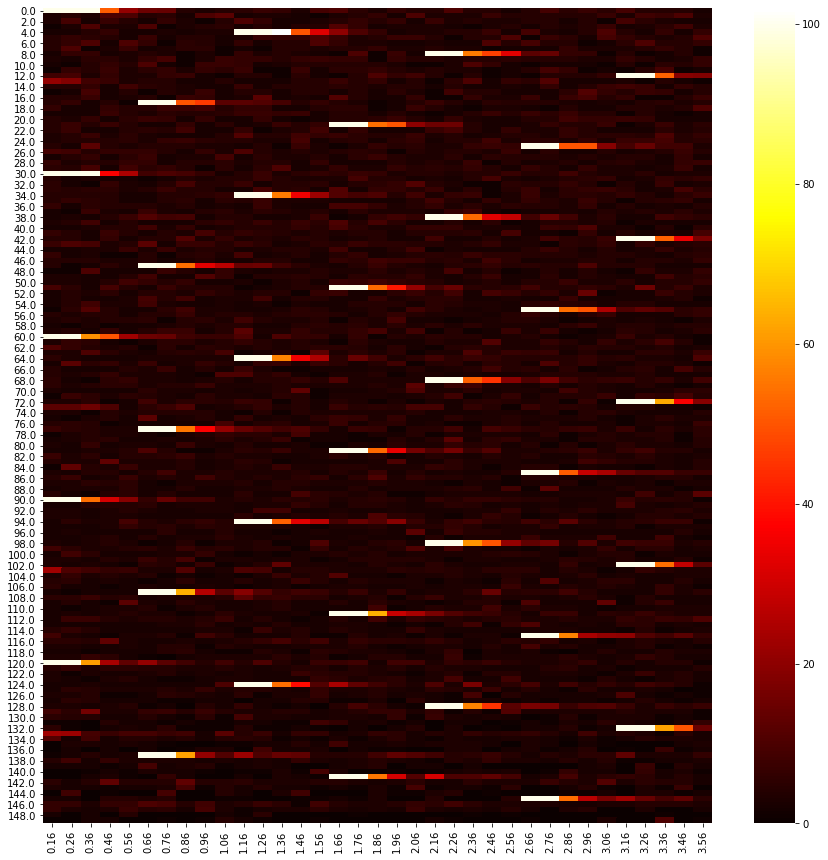

In [ ]:
# Display grid search values
import matplotlib
import pandas as pd
import seaborn as sns
# Convert array to numpy array
npa = np.asarray(information, dtype=np.float64)
# Transpose the information to split the three attribute in their corespinding
# lists
Tinfo = npa.transpose()
# Extract error numbers
error = Tinfo[2]
# Round the gamma values to the nearest 2 d.p
# Also get all the unique gamma values
arr = []
x = np.unique(Tinfo[0])
for t in range(len(x)):
  x[t] = round(x[t], 2)
print(x)
# Get all the unique PC number values
y = np.unique(Tinfo[1])
counter = 0

# Sort the errors so that each row in the list is for one gamma value with each
# values corresponding to the next PC value
for a in y:
  row = []
  for b in x:
    row.append(error[counter])
    # Find gamma and PC combinations that result in 0 errors
    counter += 1
  arr.append(row)
arr = np.array(arr)

# Convert data to a heat map
xs, ys = np.meshgrid(x, y)
xs = Tinfo[0]
ys = Tinfo[1]
fig, ax = plt.subplots(figsize = (15, 15))
df = pd.DataFrame(arr, y, x)
# Use hot color way
sns.heatmap(df, cmap ='hot', linewidths = 0.0, annot = False)


